# Electrode Microwave Region 5 Rods

**Maxwell file**
```
Electric Field Rods Field Shaping Optimization - 5 Rods
```

![drawing](5rods_drawing.PNG)

simulate potential and electric field for the configuration shown in the figure.  
The separation between left and right electrodes, **SEP**, was varied as was the positioning of **R1**.  
The electric field inhomogeneity in the center rectangle was used as the cost function for minimization.

The microwaves are in the 10s GHz range, so I took a minimum separation beteween electrode rods of 3 cm, corresponding to 100 GHz.

  * the top and bottom electrode rods are at $\pm$70 mm
  * electrode rods at $\pm$1000 V
  * center rods at 0 V
  * rod radius = 1 mm
  * boundary conditions are 0 V at $\infty$  
  
Need to redo simulation when shape of vacuum vessel is known, brings ground much closer to beamline.

In [2]:
def set_fontsize(ax, fs):
    """
    Function to set font sizes for axes objects
    """
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs)
    ax.xaxis.label.set_size(fs)
    ax.yaxis.label.set_size(fs)
    ax.title.set_size(fs)

## Parametric Sweep

In [3]:
from scipy.interpolate import griddata
import numpy as np
def generate_gridded_interpolate(x, y, data, method = 'cubic'):
    xi = np.linspace(x.min(), x.max(), 101)
    yi = np.linspace(y.min(), y.max(), 101)
    xx, yy = np.meshgrid(xi, yi)
    return xx, yy, griddata((x,y), data, xi = (xx,yy), method = method)


def string_to_num(df, colname, remove = False):
    if not remove:
        df[colname] = pd.to_numeric(df[colname]) 
    else:
        df[colname] = [float(val.strip(remove)) for val in df[colname].values]

In [4]:
import pandas as pd

data_dir = '../Data/Ansys/'

df_para = pd.read_csv(data_dir+'ParametricSetup1_Result_5rods.csv')
string_to_num(df_para, '$R1', remove = 'mm')
string_to_num(df_para, '$SEP', remove = 'mm')
df_para = df_para.rename(columns = {'fmin: None':'Cost'})
df_para.head()

,Variation,$R1,$SEP,Cost
0,1,30.0,30.0,0.046512
1,2,30.0,31.0,0.039827
2,3,30.0,32.0,0.031685
3,4,30.0,33.0,0.029281
4,5,30.0,34.0,0.025516


In [5]:
xx, yy, cost = generate_gridded_interpolate(df_para['$R1'].values, 
                                            df_para['$SEP'].values, 
                                            df_para['Cost'].values)

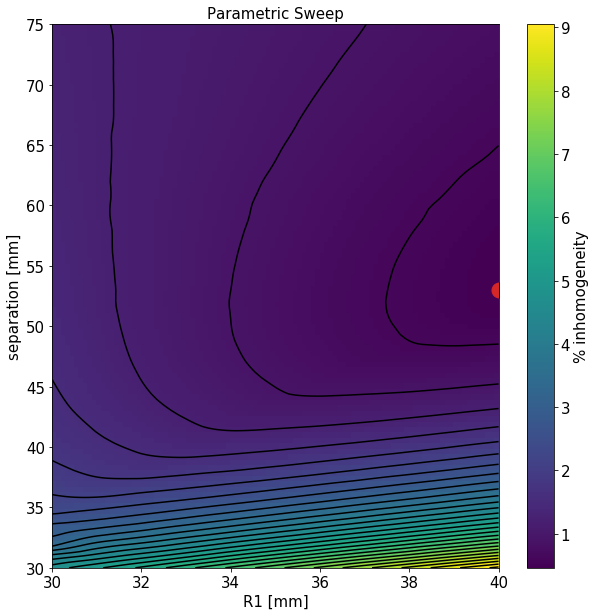

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,10))
pc = ax.pcolormesh(xx, yy, 100*cost)
ax.contour(xx,yy,cost, 30, colors = 'k')
ax.set_xlabel('R1 [mm]')
ax.set_ylabel('separation [mm]');
ax.set_title('Parametric Sweep')
set_fontsize(ax, 15)

R1 = df_para.iloc[df_para.Cost.idxmin()]['$R1']
sep = df_para.iloc[df_para.Cost.idxmin()]['$SEP']
ax.plot(R1, sep, '.', ms = 30, color = 'C3')

cbar = fig.colorbar(pc);
cbar.set_label('% inhomogeneity', fontsize = 15)
cbar.ax.tick_params(labelsize=15)
fig.savefig('sweep_5rods.png')

minimum inhomogeneity parameters are

In [11]:
df_para.iloc[df_para.Cost.idxmin()]

Variation    484.000000
$R1           40.000000
$SEP          53.000000
Cost           0.004588
Name: 483, dtype: float64

### Finer Grid around optimum parameters

In [12]:
df_para = pd.read_csv(data_dir+'ParametricSetup1_Result_5rods_fine.csv')
string_to_num(df_para, '$R1', remove = 'mm')
string_to_num(df_para, '$SEP', remove = 'mm')
df_para = df_para.rename(columns = {'fmin: None':'Cost'})
df_para.head()

,Variation,$R1,$SEP,Cost
0,1,38.0,48.0,0.006212
1,2,38.0,48.2,0.006124
2,3,38.0,48.4,0.006074
3,4,38.0,48.6,0.006031
4,5,38.0,48.8,0.005989


In [13]:
xx, yy, cost = generate_gridded_interpolate(df_para['$R1'].values, 
                                            df_para['$SEP'].values, 
                                            df_para['Cost'].values)

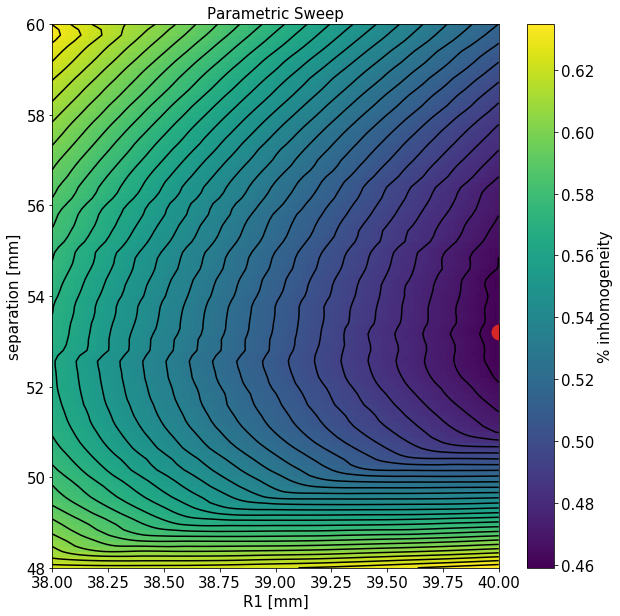

In [14]:
fig, ax = plt.subplots(figsize = (10,10))
pc = ax.pcolormesh(xx, yy, 100*cost)
ax.contour(xx,yy,cost, 30, colors = 'k')
ax.set_xlabel('R1 [mm]')
ax.set_ylabel('separation [mm]');
ax.set_title('Parametric Sweep')
set_fontsize(ax, 15)

R1 = df_para.iloc[df_para.Cost.idxmin()]['$R1']
sep = df_para.iloc[df_para.Cost.idxmin()]['$SEP']
ax.plot(R1, sep, '.', ms = 30, color = 'C3')

cbar = fig.colorbar(pc);
cbar.set_label('% inhomogeneity', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

minimum inhomogeneity parameters are

In [15]:
df_para.iloc[df_para.Cost.idxmin()]

Variation    637.000000
$R1           40.000000
$SEP          53.200000
Cost           0.004581
Name: 636, dtype: float64

## Optimization

In [16]:
df_opt = pd.read_csv(data_dir+'OptimizationSetup1_Result_5rods.csv')
string_to_num(df_opt, '$R1', remove = 'mm')
string_to_num(df_opt, '$SEP', remove = 'mm')
df_opt.head()

,Evaluation,$R1,$SEP,Cost
0,1,35.000000,60.000000,0.000073
1,2,35.171065,60.000000,0.000071
2,3,35.000000,60.342129,0.000074
3,4,35.000000,59.657871,0.000073
4,5,36.000000,59.954188,0.000061


In [17]:
xx, yy, cost = generate_gridded_interpolate(df_opt['$R1'].values, 
                                            df_opt['$SEP'].values, 
                                            df_opt['Cost'].values)

In [18]:
def calculate_aspect(x,y):
    return (y.ptp()/x.ptp())/(np.unique(y).size/np.unique(x).size)

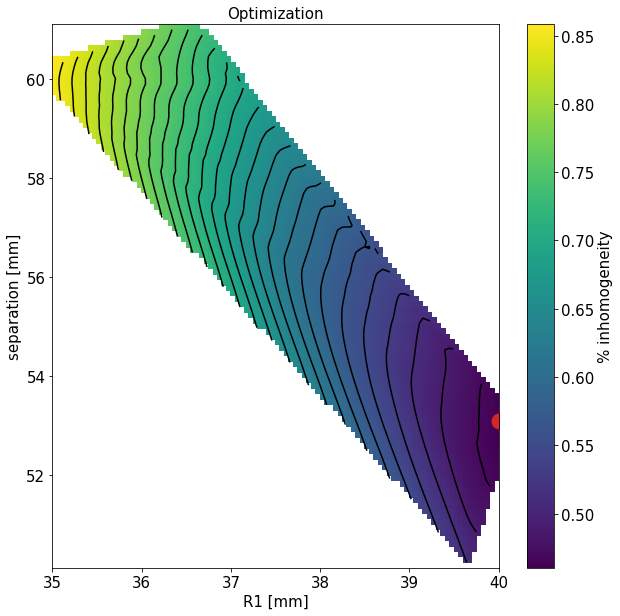

In [20]:
fig, ax = plt.subplots(figsize = (10,10))
pc = ax.pcolormesh(xx, yy, np.sqrt(cost)*100)
ax.contour(xx,yy,cost, 30, colors = 'k')
ax.set_xlabel('R1 [mm]')
ax.set_ylabel('separation [mm]');
ax.set_title('Optimization')
set_fontsize(ax, 15)

R1 = df_opt.iloc[df_opt.Cost.idxmin()]['$R1']
sep = df_opt.iloc[df_opt.Cost.idxmin()]['$SEP']
ax.plot(R1,sep, '.', ms = 30, color = 'C3')

cbar = fig.colorbar(pc);
cbar.set_label('% inhomogeneity', fontsize = 15)
cbar.ax.tick_params(labelsize=15)
fig.savefig('optimization_5rods.png')

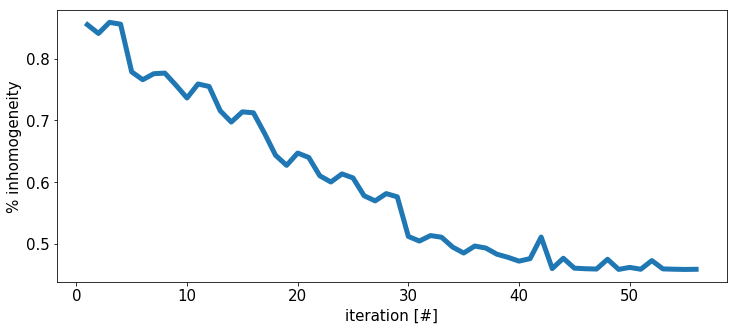

In [21]:
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(df_opt.Evaluation, np.sqrt(df_opt.Cost)*100, lw = 5)
set_fontsize(ax, 15)
ax.locator_params(axis = 'y', nbins = 5)
ax.set_xlabel('iteration [#]')
ax.set_ylabel('% inhomogeneity');

Parameters for which the inhomogeneity is minimized

In [22]:
df_opt.iloc[df_opt.Cost.idxmin()]

Evaluation    55.000000
$R1           40.000000
$SEP          53.086305
Cost           0.000021
Name: 54, dtype: float64

so **R1** at 40 mm and **SEP** at 53.09 mm gives the best homogeneity

## Loading the potential

In [23]:
def load_fld_potential(fname, data_dir = data_dir):
    names = ['x', 'y', 'z', 'V']
    df = pd.read_csv(data_dir+fname, skiprows = 2, header = None, delim_whitespace = True,
                     names = names)
    return df

In [24]:
potential = load_fld_potential('potential_5rods.fld')

In [25]:
potential.head()

,x,y,z,V
0,-0.07,-0.08000,0.0,-555.428131
1,-0.07,-0.07975,0.0,-557.408444
2,-0.07,-0.07950,0.0,-559.379488
3,-0.07,-0.07925,0.0,-561.341264
4,-0.07,-0.07900,0.0,-563.293770


## Plotting Potential

In [26]:
def generate_gridded(x, y, data):
    xx, yy = np.meshgrid(np.unique(x), np.unique(y))
    x_vals, x_ind = np.unique(x, return_inverse = True)
    y_vals, y_ind = np.unique(y, return_inverse = True)
    data_array = np.empty(x_vals.shape + y_vals.shape)
    data_array.fill(np.nan)
    data_array[x_ind, y_ind] = data
    return xx, yy, data_array.T

In [27]:
xx, yy, potential_array = generate_gridded(potential.x, 
                                           potential.y, 
                                           potential.V)

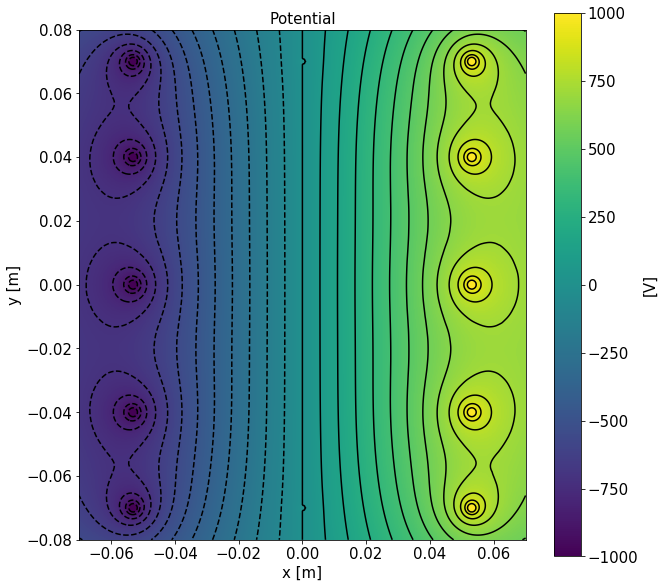

In [30]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_aspect(calculate_aspect(xx,yy))
pc = ax.pcolormesh(xx, yy, potential_array)
ax.contour(xx,yy,potential_array, 30, colors = 'k')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('Potential')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[V]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)
fig.savefig('potential_5rods.png')

In [31]:
xc, yc = np.array(xx.shape)//2

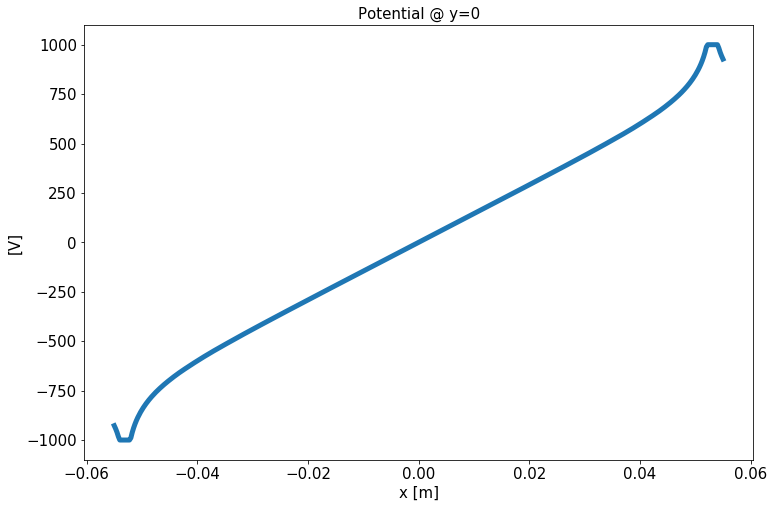

In [32]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title(r'Potential @ y=0')
ax.plot(xx[xc,60:-60], potential_array[xc,60:-60], lw = 5)
set_fontsize(ax, 15)
ax.set_xlabel('x [m]')
ax.set_ylabel('[V]');

## Loading Electric Field

In [33]:
def load_fld_field(fname, data_dir = data_dir):
    names = ['x', 'y', 'z', 'Ex', 'Ey', 'Ez']
    df = pd.read_csv(data_dir+fname, skiprows = 2, header = None, 
                     delim_whitespace = True, names = names)
    return df

In [34]:
field = load_fld_field('field_5rods.fld')

In [35]:
field.head()

,x,y,z,Ex,Ey,Ez
0,-0.07,-0.08000,0.0,4563.804021,7954.728917,0.0
1,-0.07,-0.07975,0.0,4660.235964,7919.048653,0.0
2,-0.07,-0.07950,0.0,4755.334361,7882.009938,0.0
3,-0.07,-0.07925,0.0,4849.099212,7843.612771,0.0
4,-0.07,-0.07900,0.0,4941.530516,7803.857152,0.0


## Generating Gridded Field

In [36]:
xx, yy, Ex = generate_gridded(field.x.values, 
                              field.y.values, 
                              field.Ex.values)
_, _, Ey = generate_gridded(field.x.values, 
                            field.y.values, 
                            field.Ey.values)
Emag = np.sqrt(Ex**2+Ey**2)

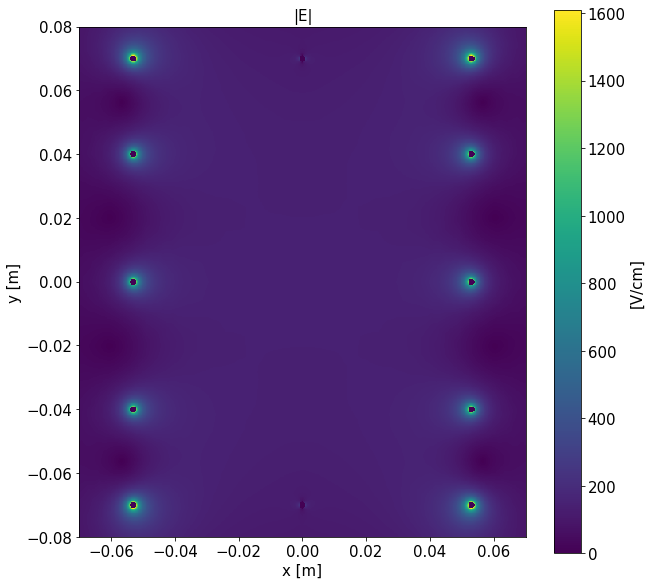

In [37]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_aspect(calculate_aspect(xx,yy))
pc = ax.pcolormesh(xx, yy, Emag/100)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('|E|')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[V/cm]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

In [38]:
xc, yc = np.array(xx.shape)//2

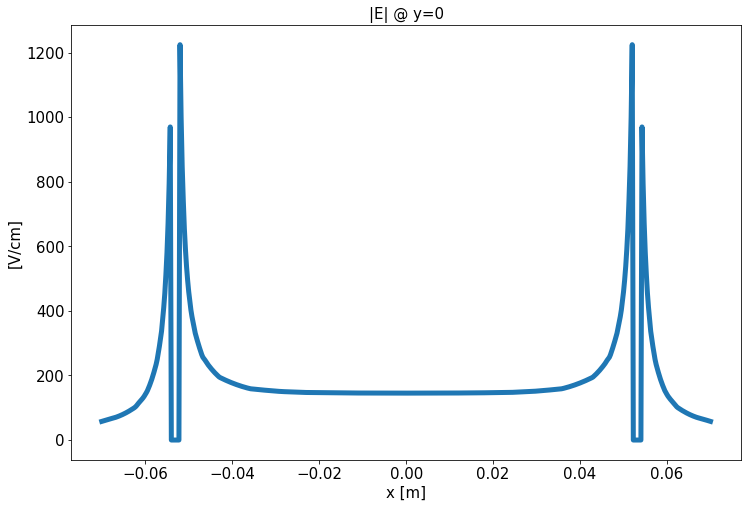

In [39]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title(r'|E| @ y=0')
ax.plot(xx[xc,:], Emag[xc,:]/100, lw = 5)
set_fontsize(ax, 15)
ax.set_xlabel('x [m]')
ax.set_ylabel('[V/cm]');

## Zooming to beam region

In [40]:
potential_center = load_fld_potential('potential_5rods_center.fld')
field_center = load_fld_field('field_5rods_center.fld')

In [41]:
xx, yy, potential_array = generate_gridded(potential_center.x, 
                                           potential_center.y, 
                                           potential_center.V)

In [42]:
xx, yy, Ex = generate_gridded(field_center.x.values, 
                              field_center.y.values, 
                              field_center.Ex.values)
_, _, Ey = generate_gridded(field_center.x.values, 
                            field_center.y.values, 
                            field_center.Ey.values)
Emag = np.sqrt(Ex**2+Ey**2)

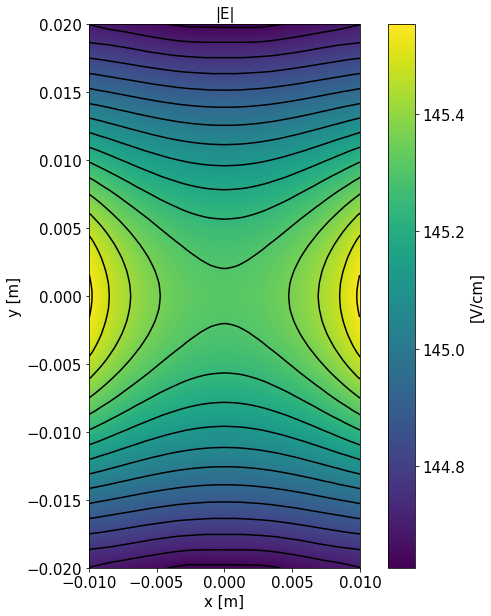

In [43]:
fig, ax = plt.subplots(figsize = (10,10))
pc = ax.pcolormesh(xx, yy, Emag/100)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_aspect(calculate_aspect(xx,yy))
ax.contour(xx,yy,Emag, 15, colors = 'k')
ax.locator_params(axis='x', nbins = 4)
ax.set_title('|E|')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[V/cm]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

it seems most of the inhomogeneity comes from the two electrode rods on the left and right side at y=0.

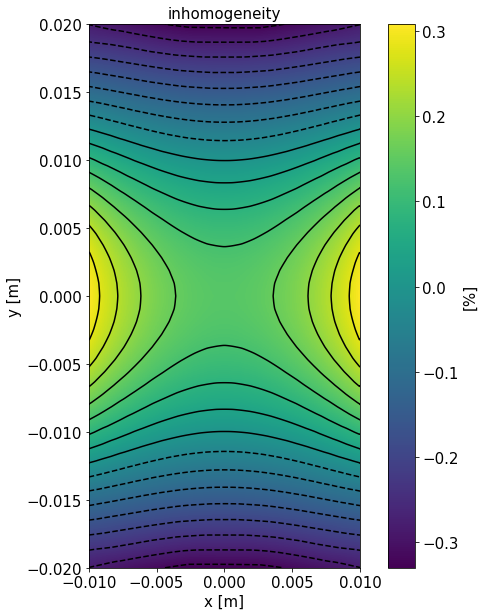

In [45]:
inhomogeneity = 100*(Emag-Emag.mean())/Emag.mean()
fig, ax = plt.subplots(figsize = (10,10))
pc = ax.pcolormesh(xx, yy, inhomogeneity)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_aspect(calculate_aspect(xx,yy))
ax.contour(xx,yy,inhomogeneity, 15, colors = 'k')
ax.locator_params(axis='x', nbins = 4)
ax.set_title('inhomogeneity')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[%]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)
fig.savefig('inhomogeneity_5rods.png')

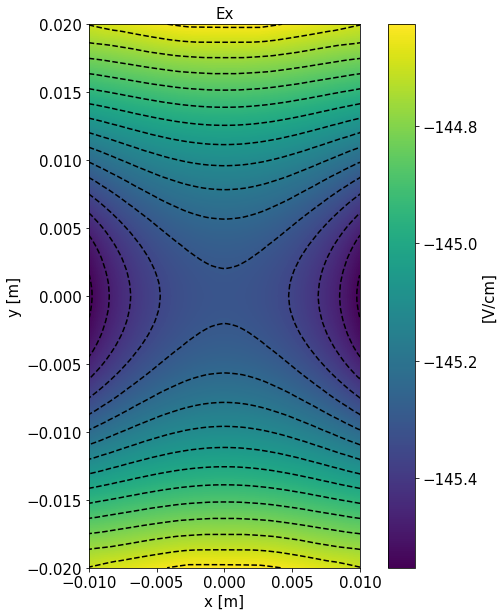

In [65]:
fig, ax = plt.subplots(figsize = (10,10))
pc = ax.pcolormesh(xx, yy, Ex/100)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_aspect(calculate_aspect(xx,yy))
ax.contour(xx,yy,Ex, 15, colors = 'k')
ax.locator_params(axis='x', nbins = 4)
ax.set_title('Ex')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[V/cm]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

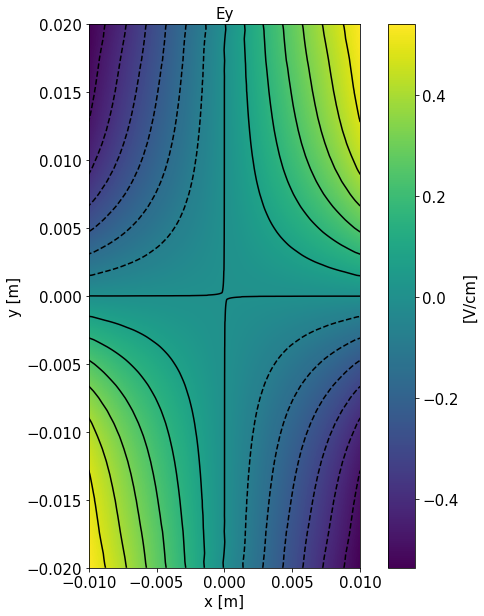

In [66]:
fig, ax = plt.subplots(figsize = (10,10))
pc = ax.pcolormesh(xx, yy, Ey/100)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_aspect(calculate_aspect(xx,yy))
ax.contour(xx,yy,Ey, 15, colors = 'k')
ax.locator_params(axis='x', nbins = 4)
ax.set_title('Ey')
set_fontsize(ax, 15)

cbar = fig.colorbar(pc);
cbar.set_label('[V/cm]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

In [67]:
xc, yc = np.array(xx.shape)//2

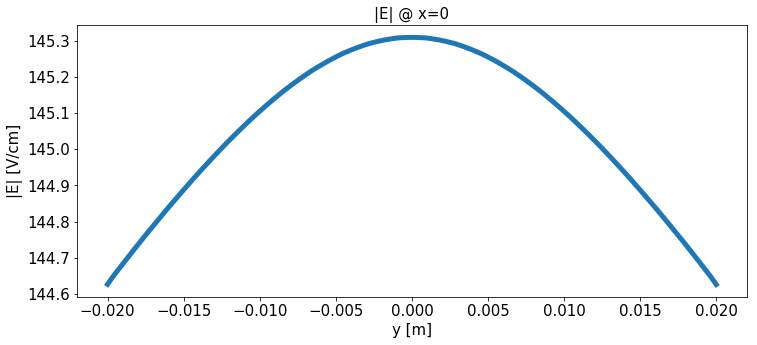

In [68]:
fig, ax = plt.subplots(figsize = (12,5))
ax.set_title(r'|E| @ x=0')
ax.plot(yy[:,yc], Emag[:,yc]/100, lw = 5)
set_fontsize(ax, 15)
ax.set_xlabel('y [m]')
ax.set_ylabel('|E| [V/cm]');

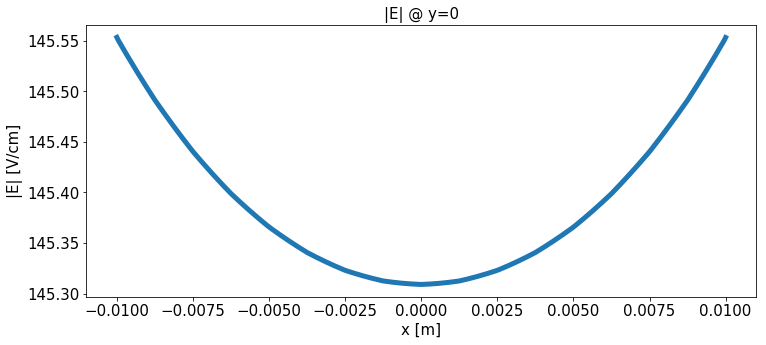

In [69]:
fig, ax = plt.subplots(figsize = (12,5))
ax.set_title(r'|E| @ y=0')
ax.plot(xx[xc,:], Emag[xc,:]/100, lw = 5)
set_fontsize(ax, 15)
ax.set_xlabel('x [m]')
ax.set_ylabel('|E| [V/cm]');

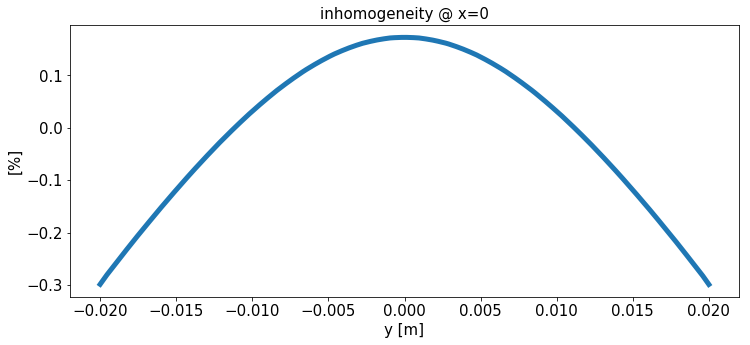

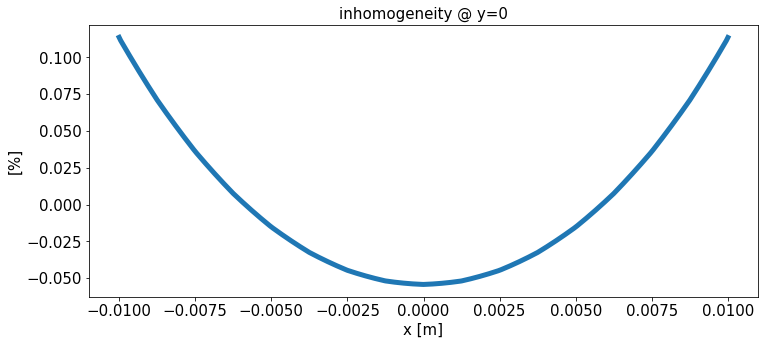

In [72]:
fig, ax = plt.subplots(figsize = (12,5))
ax.set_title(r'inhomogeneity @ x=0')
ax.plot(yy[:,yc], 100*(Emag[:,yc]-Emag.mean())/(Emag.mean()), lw = 5)
set_fontsize(ax, 15)
ax.set_xlabel('y [m]')
ax.set_ylabel('[%]');

fig, ax = plt.subplots(figsize = (12,5))
ax.set_title(r'inhomogeneity @ y=0')
ax.plot(xx[xc,:], 100*(Emag[xc,:]-Emag[xc,:].mean())/(Emag[xc,:]), lw = 5)
set_fontsize(ax, 15)
ax.set_xlabel('x [m]')
ax.set_ylabel('[%]');